In [112]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from random import sample
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score
from scipy.stats import spearmanr
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import math

### Pre-processing of data and Normalizing the columns for Machine Learning

In [113]:
# read in the data

data = pd.read_csv('clearCellFirehoseRNASeq.txt', sep = '\t')

In [114]:
data


,Hugo_Symbol,Entrez_Gene_Id,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
0,LOC100130426,100130426,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,...,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863
1,UBE2Q2P3,100133144,-0.5997,-0.8006,-0.5059,-1.0747,0.3223,0.9392,0.3312,1.4031,...,-1.4326,-0.3610,-2.6026,-1.8038,-1.0776,0.0191,1.6135,-0.6972,1.1870,-0.3087
2,UBE2Q2P3,100134869,1.5294,-0.8942,0.9541,-0.1385,-0.7343,0.1430,1.7641,1.3759,...,-1.3253,-0.2257,0.9509,0.1075,0.0196,-0.3816,-0.6012,1.0341,0.9998,1.2304
3,HMGB1P1,10357,-0.1743,-1.4697,-0.4060,0.5085,0.3452,0.2735,-0.7562,1.0121,...,-2.2789,0.1130,-2.1877,-0.1235,-0.9911,0.7654,0.5317,-0.7856,0.8189,-0.3162
4,TIMM23,10431,-0.5550,1.8552,-0.3691,-0.6454,0.1476,0.0609,1.0288,-1.3732,...,3.3179,-0.0193,1.9638,-0.4724,-0.9318,-0.1537,-0.1316,1.7282,-0.4700,1.3202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,7791,-0.1694,-0.5352,-1.1693,-0.0322,0.4678,-0.2749,-0.9984,0.3001,...,-0.0135,0.1437,-0.5773,0.1874,0.5397,0.5904,-0.2986,0.7237,-0.0192,-1.9445
20527,FLJ10821,23140,-0.8894,0.8195,-0.2563,-0.4037,1.0259,0.3476,2.4646,0.2701,...,-1.0479,-0.7105,-2.5634,-0.0044,0.9041,0.0840,-0.9393,0.0762,-0.2676,1.0503
20528,ZZZ3,26009,-1.2508,1.2450,1.3399,0.2349,1.0711,1.1589,1.9548,0.1455,...,-1.2117,-1.3049,-1.8164,-3.5465,-0.3412,-0.4081,-0.4785,-0.8519,-1.3052,-1.2832
20529,TPTEP1,387590,0.1191,2.0039,-0.7256,0.1319,-0.8912,-1.2581,-0.3616,0.2759,...,-0.6610,-0.0697,-0.9028,0.5218,0.6463,0.6171,-0.1280,2.6883,-0.4012,1.9043


In [115]:
data = data.drop(['Entrez_Gene_Id'], axis=1)
data

,Hugo_Symbol,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,TCGA-A3-3317-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
0,LOC100130426,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,...,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863
1,UBE2Q2P3,-0.5997,-0.8006,-0.5059,-1.0747,0.3223,0.9392,0.3312,1.4031,1.5672,...,-1.4326,-0.3610,-2.6026,-1.8038,-1.0776,0.0191,1.6135,-0.6972,1.1870,-0.3087
2,UBE2Q2P3,1.5294,-0.8942,0.9541,-0.1385,-0.7343,0.1430,1.7641,1.3759,1.6364,...,-1.3253,-0.2257,0.9509,0.1075,0.0196,-0.3816,-0.6012,1.0341,0.9998,1.2304
3,HMGB1P1,-0.1743,-1.4697,-0.4060,0.5085,0.3452,0.2735,-0.7562,1.0121,-0.4390,...,-2.2789,0.1130,-2.1877,-0.1235,-0.9911,0.7654,0.5317,-0.7856,0.8189,-0.3162
4,TIMM23,-0.5550,1.8552,-0.3691,-0.6454,0.1476,0.0609,1.0288,-1.3732,0.4353,...,3.3179,-0.0193,1.9638,-0.4724,-0.9318,-0.1537,-0.1316,1.7282,-0.4700,1.3202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,-0.1694,-0.5352,-1.1693,-0.0322,0.4678,-0.2749,-0.9984,0.3001,0.6667,...,-0.0135,0.1437,-0.5773,0.1874,0.5397,0.5904,-0.2986,0.7237,-0.0192,-1.9445
20527,FLJ10821,-0.8894,0.8195,-0.2563,-0.4037,1.0259,0.3476,2.4646,0.2701,1.4763,...,-1.0479,-0.7105,-2.5634,-0.0044,0.9041,0.0840,-0.9393,0.0762,-0.2676,1.0503
20528,ZZZ3,-1.2508,1.2450,1.3399,0.2349,1.0711,1.1589,1.9548,0.1455,1.5323,...,-1.2117,-1.3049,-1.8164,-3.5465,-0.3412,-0.4081,-0.4785,-0.8519,-1.3052,-1.2832
20529,TPTEP1,0.1191,2.0039,-0.7256,0.1319,-0.8912,-1.2581,-0.3616,0.2759,0.8077,...,-0.6610,-0.0697,-0.9028,0.5218,0.6463,0.6171,-0.1280,2.6883,-0.4012,1.9043


In [116]:
# remove genes which were NaN

data = data.dropna(subset=['Hugo_Symbol'])
data

,Hugo_Symbol,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,TCGA-A3-3317-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
0,LOC100130426,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,...,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863,-3.0863
1,UBE2Q2P3,-0.5997,-0.8006,-0.5059,-1.0747,0.3223,0.9392,0.3312,1.4031,1.5672,...,-1.4326,-0.3610,-2.6026,-1.8038,-1.0776,0.0191,1.6135,-0.6972,1.1870,-0.3087
2,UBE2Q2P3,1.5294,-0.8942,0.9541,-0.1385,-0.7343,0.1430,1.7641,1.3759,1.6364,...,-1.3253,-0.2257,0.9509,0.1075,0.0196,-0.3816,-0.6012,1.0341,0.9998,1.2304
3,HMGB1P1,-0.1743,-1.4697,-0.4060,0.5085,0.3452,0.2735,-0.7562,1.0121,-0.4390,...,-2.2789,0.1130,-2.1877,-0.1235,-0.9911,0.7654,0.5317,-0.7856,0.8189,-0.3162
4,TIMM23,-0.5550,1.8552,-0.3691,-0.6454,0.1476,0.0609,1.0288,-1.3732,0.4353,...,3.3179,-0.0193,1.9638,-0.4724,-0.9318,-0.1537,-0.1316,1.7282,-0.4700,1.3202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,-0.1694,-0.5352,-1.1693,-0.0322,0.4678,-0.2749,-0.9984,0.3001,0.6667,...,-0.0135,0.1437,-0.5773,0.1874,0.5397,0.5904,-0.2986,0.7237,-0.0192,-1.9445
20527,FLJ10821,-0.8894,0.8195,-0.2563,-0.4037,1.0259,0.3476,2.4646,0.2701,1.4763,...,-1.0479,-0.7105,-2.5634,-0.0044,0.9041,0.0840,-0.9393,0.0762,-0.2676,1.0503
20528,ZZZ3,-1.2508,1.2450,1.3399,0.2349,1.0711,1.1589,1.9548,0.1455,1.5323,...,-1.2117,-1.3049,-1.8164,-3.5465,-0.3412,-0.4081,-0.4785,-0.8519,-1.3052,-1.2832
20529,TPTEP1,0.1191,2.0039,-0.7256,0.1319,-0.8912,-1.2581,-0.3616,0.2759,0.8077,...,-0.6610,-0.0697,-0.9028,0.5218,0.6463,0.6171,-0.1280,2.6883,-0.4012,1.9043


In [117]:
# transpose the data so that genes are columns and rows are samples

data = np.transpose(data)
data



,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P
TCGA-3Z-A93Z-01,-3.0863,-0.5997,1.5294,-0.1743,-0.555,NaN,-0.0905,-1.9249,-0.9372,NaN,...,-1.3732,-1.533,-1.822,0.6648,-1.5634,-0.1694,-0.8894,-1.2508,0.1191,-1.1115
TCGA-6D-AA2E-01,-3.0863,-0.8006,-0.8942,-1.4697,1.8552,NaN,0.1934,0.0736,-0.9372,NaN,...,-0.6671,-1.466,0.1925,-1.1695,-0.2838,-0.5352,0.8195,1.245,2.0039,-1.1115
TCGA-A3-3306-01,-3.0863,-0.5059,0.9541,-0.406,-0.3691,NaN,0.0083,0.6337,-0.9372,NaN,...,0.6989,0.553,-1.9006,-1.3729,0.2363,-1.1693,-0.2563,1.3399,-0.7256,-1.1115
TCGA-A3-3307-01,-3.0863,-1.0747,-0.1385,0.5085,-0.6454,NaN,-0.0301,0.9199,-0.9372,NaN,...,0.1318,0.5613,0.3562,0.0273,0.2199,-0.0322,-0.4037,0.2349,0.1319,-1.1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-MM-A563-01,-3.0863,0.0191,-0.3816,0.7654,-0.1537,NaN,1.4572,0.5848,-0.9372,NaN,...,-0.8858,-1.0717,0.2287,0.9019,-0.4154,0.5904,0.084,-0.4081,0.6171,-1.1115
TCGA-MM-A564-01,-3.0863,1.6135,-0.6012,0.5317,-0.1316,NaN,2.2147,-1.9249,-0.9372,NaN,...,-1.066,-0.5223,-1.7481,-1.946,-1.0858,-0.2986,-0.9393,-0.4785,-0.128,-1.1115
TCGA-MM-A84U-01,-3.0863,-0.6972,1.0341,-0.7856,1.7282,NaN,0.8359,0.1353,-0.9372,NaN,...,-1.1875,-1.4321,-0.6931,-1.5856,-1.2657,0.7237,0.0762,-0.8519,2.6883,-1.1115
TCGA-MW-A4EC-01,-3.0863,1.187,0.9998,0.8189,-0.47,NaN,0.5836,-0.9869,-0.9372,NaN,...,-0.0867,-0.2302,-1.6516,-0.5117,-1.2706,-0.0192,-0.2676,-1.3052,-0.4012,-1.1115


In [118]:
# rename columns for dataframe

columns = data.iloc[0]

In [119]:
data = data[1:]

In [120]:
data.columns = columns
data

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P
TCGA-3Z-A93Z-01,-3.0863,-0.5997,1.5294,-0.1743,-0.555,NaN,-0.0905,-1.9249,-0.9372,NaN,...,-1.3732,-1.533,-1.822,0.6648,-1.5634,-0.1694,-0.8894,-1.2508,0.1191,-1.1115
TCGA-6D-AA2E-01,-3.0863,-0.8006,-0.8942,-1.4697,1.8552,NaN,0.1934,0.0736,-0.9372,NaN,...,-0.6671,-1.466,0.1925,-1.1695,-0.2838,-0.5352,0.8195,1.245,2.0039,-1.1115
TCGA-A3-3306-01,-3.0863,-0.5059,0.9541,-0.406,-0.3691,NaN,0.0083,0.6337,-0.9372,NaN,...,0.6989,0.553,-1.9006,-1.3729,0.2363,-1.1693,-0.2563,1.3399,-0.7256,-1.1115
TCGA-A3-3307-01,-3.0863,-1.0747,-0.1385,0.5085,-0.6454,NaN,-0.0301,0.9199,-0.9372,NaN,...,0.1318,0.5613,0.3562,0.0273,0.2199,-0.0322,-0.4037,0.2349,0.1319,-1.1115
TCGA-A3-3308-01,-3.0863,0.3223,-0.7343,0.3452,0.1476,NaN,0.9885,-0.1476,-0.9372,NaN,...,0.1838,0.127,1.4465,-1.421,0.3683,0.4678,1.0259,1.0711,-0.8912,-1.1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-MM-A563-01,-3.0863,0.0191,-0.3816,0.7654,-0.1537,NaN,1.4572,0.5848,-0.9372,NaN,...,-0.8858,-1.0717,0.2287,0.9019,-0.4154,0.5904,0.084,-0.4081,0.6171,-1.1115
TCGA-MM-A564-01,-3.0863,1.6135,-0.6012,0.5317,-0.1316,NaN,2.2147,-1.9249,-0.9372,NaN,...,-1.066,-0.5223,-1.7481,-1.946,-1.0858,-0.2986,-0.9393,-0.4785,-0.128,-1.1115
TCGA-MM-A84U-01,-3.0863,-0.6972,1.0341,-0.7856,1.7282,NaN,0.8359,0.1353,-0.9372,NaN,...,-1.1875,-1.4321,-0.6931,-1.5856,-1.2657,0.7237,0.0762,-0.8519,2.6883,-1.1115
TCGA-MW-A4EC-01,-3.0863,1.187,0.9998,0.8189,-0.47,NaN,0.5836,-0.9869,-0.9372,NaN,...,-0.0867,-0.2302,-1.6516,-0.5117,-1.2706,-0.0192,-0.2676,-1.3052,-0.4012,-1.1115


### Matching sample ID with metastasis status

In [121]:
metastasis = pd.read_csv('clearCellFirehoseClinical.txt', sep = '\t')

In [122]:
metastasis

,Study ID,Patient ID,Sample ID,Diagnosis Age,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,...,Adjuvant Postoperative Targeted Therapy Administered Indicator,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,TMB (nonsynonymous),Patient Smoking History Category,Primary Therapy Outcome Success Type,Person Neoplasm Status,Vial number,WBC
0,kirc_tcga,TCGA-3Z-A93Z,TCGA-3Z-A93Z-01,69,M0,M0,N0,Stage I,7th,T1a,...,NO,NaN,NaN,3Z,NaN,5.0,NaN,TUMOR FREE,A,Normal
1,kirc_tcga,TCGA-6D-AA2E,TCGA-6D-AA2E-01,68,MX,MX,NX,Stage I,7th,T1b,...,NO,NaN,NaN,6D,NaN,1.0,NaN,TUMOR FREE,A,NaN
2,kirc_tcga,TCGA-A3-3306,TCGA-A3-3306-01,67,NaN,M0,N0,Stage I,NaN,T1b,...,NaN,NaN,NaN,A3,NaN,NaN,NaN,NaN,A,NaN
3,kirc_tcga,TCGA-A3-3307,TCGA-A3-3307-01,66,NaN,M0,N0,Stage III,NaN,T3b,...,NaN,NaN,NaN,A3,NaN,NaN,NaN,WITH TUMOR,A,NaN
4,kirc_tcga,TCGA-A3-3308,TCGA-A3-3308-01,77,NaN,M0,N0,Stage III,NaN,T3b,...,NaN,NaN,NaN,A3,21.966667,NaN,NaN,TUMOR FREE,A,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,kirc_tcga,TCGA-MM-A563,TCGA-MM-A563-01,41,MX,MX,NX,NaN,7th,T3,...,NO,NaN,NaN,MM,NaN,2.0,Complete Remission/Response,TUMOR FREE,A,Normal
534,kirc_tcga,TCGA-MM-A564,TCGA-MM-A564-01,68,MX,MX,NX,Stage II,7th,T2a,...,NO,NaN,NaN,MM,NaN,1.0,Complete Remission/Response,TUMOR FREE,A,Normal
535,kirc_tcga,TCGA-MM-A84U,TCGA-MM-A84U-01,58,MX,MX,NX,Stage I,7th,T1a,...,NO,NaN,NaN,MM,NaN,2.0,Complete Remission/Response,TUMOR FREE,A,NaN
536,kirc_tcga,TCGA-MW-A4EC,TCGA-MW-A4EC-01,72,NaN,MX,NX,Stage I,7th,T1a,...,NO,NaN,NaN,MW,NaN,1.0,Complete Remission/Response,TUMOR FREE,A,Elevated


In [123]:
# obtain a list of sample ID

idList = metastasis['Sample ID'].tolist()
print(len(idList))

538


In [124]:
metStatus = metastasis['American Joint Committee on Cancer Metastasis Stage Code'].tolist()

In [125]:
dataID = data.index.tolist()



In [126]:
dataID

['TCGA-3Z-A93Z-01',
 'TCGA-6D-AA2E-01',
 'TCGA-A3-3306-01',
 'TCGA-A3-3307-01',
 'TCGA-A3-3308-01',
 'TCGA-A3-3311-01',
 'TCGA-A3-3313-01',
 'TCGA-A3-3316-01',
 'TCGA-A3-3317-01',
 'TCGA-A3-3319-01',
 'TCGA-A3-3320-01',
 'TCGA-A3-3322-01',
 'TCGA-A3-3323-01',
 'TCGA-A3-3324-01',
 'TCGA-A3-3325-01',
 'TCGA-A3-3326-01',
 'TCGA-A3-3328-01',
 'TCGA-A3-3329-01',
 'TCGA-A3-3331-01',
 'TCGA-A3-3335-01',
 'TCGA-A3-3343-01',
 'TCGA-A3-3346-01',
 'TCGA-A3-3347-01',
 'TCGA-A3-3349-01',
 'TCGA-A3-3351-01',
 'TCGA-A3-3352-01',
 'TCGA-A3-3357-01',
 'TCGA-A3-3358-01',
 'TCGA-A3-3359-01',
 'TCGA-A3-3362-01',
 'TCGA-A3-3363-01',
 'TCGA-A3-3365-01',
 'TCGA-A3-3367-01',
 'TCGA-A3-3370-01',
 'TCGA-A3-3372-01',
 'TCGA-A3-3373-01',
 'TCGA-A3-3374-01',
 'TCGA-A3-3376-01',
 'TCGA-A3-3378-01',
 'TCGA-A3-3380-01',
 'TCGA-A3-3382-01',
 'TCGA-A3-3383-01',
 'TCGA-A3-3385-01',
 'TCGA-A3-3387-01',
 'TCGA-A3-A6NI-01',
 'TCGA-A3-A6NJ-01',
 'TCGA-A3-A6NL-01',
 'TCGA-A3-A6NN-01',
 'TCGA-A3-A8CQ-01',
 'TCGA-A3-A8OU-01',


In [127]:
idList

['TCGA-3Z-A93Z-01',
 'TCGA-6D-AA2E-01',
 'TCGA-A3-3306-01',
 'TCGA-A3-3307-01',
 'TCGA-A3-3308-01',
 'TCGA-A3-3311-01',
 'TCGA-A3-3313-01',
 'TCGA-A3-3316-01',
 'TCGA-A3-3317-01',
 'TCGA-A3-3319-01',
 'TCGA-A3-3320-01',
 'TCGA-A3-3322-01',
 'TCGA-A3-3323-01',
 'TCGA-A3-3324-01',
 'TCGA-A3-3325-01',
 'TCGA-A3-3326-01',
 'TCGA-A3-3328-01',
 'TCGA-A3-3329-01',
 'TCGA-A3-3331-01',
 'TCGA-A3-3335-01',
 'TCGA-A3-3336-01',
 'TCGA-A3-3343-01',
 'TCGA-A3-3346-01',
 'TCGA-A3-3347-01',
 'TCGA-A3-3349-01',
 'TCGA-A3-3351-01',
 'TCGA-A3-3352-01',
 'TCGA-A3-3357-01',
 'TCGA-A3-3358-01',
 'TCGA-A3-3359-01',
 'TCGA-A3-3362-01',
 'TCGA-A3-3363-01',
 'TCGA-A3-3365-01',
 'TCGA-A3-3367-01',
 'TCGA-A3-3370-01',
 'TCGA-A3-3372-01',
 'TCGA-A3-3373-01',
 'TCGA-A3-3374-01',
 'TCGA-A3-3376-01',
 'TCGA-A3-3378-01',
 'TCGA-A3-3380-01',
 'TCGA-A3-3382-01',
 'TCGA-A3-3383-01',
 'TCGA-A3-3385-01',
 'TCGA-A3-3387-01',
 'TCGA-A3-A6NI-01',
 'TCGA-A3-A6NJ-01',
 'TCGA-A3-A6NL-01',
 'TCGA-A3-A6NN-01',
 'TCGA-A3-A8CQ-01',


In [128]:
# create column for metastasis status in data dataframe
listDataStatus = []
for name in dataID:
    if name in idList:
        index = idList.index(name)
        listDataStatus.append(metStatus[index])
        

In [129]:
listDataStatus

['M0',
 'MX',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'MX',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M1',
 'M1',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M1',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M0',
 'M0',
 'M1',
 'M1',
 'M0',
 'M0',
 'M0',

In [130]:
data['status'] = listDataStatus

C:\Users\Tresha\AppData\Local\Temp\ipykernel_54808\2309205045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status'] = listDataStatus


In [131]:
data

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P,status
TCGA-3Z-A93Z-01,-3.0863,-0.5997,1.5294,-0.1743,-0.555,NaN,-0.0905,-1.9249,-0.9372,NaN,...,-1.533,-1.822,0.6648,-1.5634,-0.1694,-0.8894,-1.2508,0.1191,-1.1115,M0
TCGA-6D-AA2E-01,-3.0863,-0.8006,-0.8942,-1.4697,1.8552,NaN,0.1934,0.0736,-0.9372,NaN,...,-1.466,0.1925,-1.1695,-0.2838,-0.5352,0.8195,1.245,2.0039,-1.1115,MX
TCGA-A3-3306-01,-3.0863,-0.5059,0.9541,-0.406,-0.3691,NaN,0.0083,0.6337,-0.9372,NaN,...,0.553,-1.9006,-1.3729,0.2363,-1.1693,-0.2563,1.3399,-0.7256,-1.1115,M0
TCGA-A3-3307-01,-3.0863,-1.0747,-0.1385,0.5085,-0.6454,NaN,-0.0301,0.9199,-0.9372,NaN,...,0.5613,0.3562,0.0273,0.2199,-0.0322,-0.4037,0.2349,0.1319,-1.1115,M0
TCGA-A3-3308-01,-3.0863,0.3223,-0.7343,0.3452,0.1476,NaN,0.9885,-0.1476,-0.9372,NaN,...,0.127,1.4465,-1.421,0.3683,0.4678,1.0259,1.0711,-0.8912,-1.1115,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-MM-A563-01,-3.0863,0.0191,-0.3816,0.7654,-0.1537,NaN,1.4572,0.5848,-0.9372,NaN,...,-1.0717,0.2287,0.9019,-0.4154,0.5904,0.084,-0.4081,0.6171,-1.1115,MX
TCGA-MM-A564-01,-3.0863,1.6135,-0.6012,0.5317,-0.1316,NaN,2.2147,-1.9249,-0.9372,NaN,...,-0.5223,-1.7481,-1.946,-1.0858,-0.2986,-0.9393,-0.4785,-0.128,-1.1115,MX
TCGA-MM-A84U-01,-3.0863,-0.6972,1.0341,-0.7856,1.7282,NaN,0.8359,0.1353,-0.9372,NaN,...,-1.4321,-0.6931,-1.5856,-1.2657,0.7237,0.0762,-0.8519,2.6883,-1.1115,MX
TCGA-MW-A4EC-01,-3.0863,1.187,0.9998,0.8189,-0.47,NaN,0.5836,-0.9869,-0.9372,NaN,...,-0.2302,-1.6516,-0.5117,-1.2706,-0.0192,-0.2676,-1.3052,-0.4012,-1.1115,MX


In [132]:
# filter 

In [133]:
statusData = data[data['status'].isin(['M0','M1'])]

In [134]:
statusData

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P,status
TCGA-3Z-A93Z-01,-3.0863,-0.5997,1.5294,-0.1743,-0.555,NaN,-0.0905,-1.9249,-0.9372,NaN,...,-1.533,-1.822,0.6648,-1.5634,-0.1694,-0.8894,-1.2508,0.1191,-1.1115,M0
TCGA-A3-3306-01,-3.0863,-0.5059,0.9541,-0.406,-0.3691,NaN,0.0083,0.6337,-0.9372,NaN,...,0.553,-1.9006,-1.3729,0.2363,-1.1693,-0.2563,1.3399,-0.7256,-1.1115,M0
TCGA-A3-3307-01,-3.0863,-1.0747,-0.1385,0.5085,-0.6454,NaN,-0.0301,0.9199,-0.9372,NaN,...,0.5613,0.3562,0.0273,0.2199,-0.0322,-0.4037,0.2349,0.1319,-1.1115,M0
TCGA-A3-3308-01,-3.0863,0.3223,-0.7343,0.3452,0.1476,NaN,0.9885,-0.1476,-0.9372,NaN,...,0.127,1.4465,-1.421,0.3683,0.4678,1.0259,1.0711,-0.8912,-1.1115,M0
TCGA-A3-3311-01,-3.0863,0.9392,0.143,0.2735,0.0609,NaN,-0.3747,-1.1392,-0.9372,NaN,...,1.0126,0.3702,0.7608,1.1406,-0.2749,0.3476,1.1589,-1.2581,-1.1115,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EU-5904-01,-3.0863,0.0395,-1.1065,0.2901,-1.7599,NaN,-0.2565,-1.9249,-0.9372,NaN,...,0.633,0.5288,0.2387,0.7883,-0.2852,-0.0469,0.2443,0.8693,-1.1115,M0
TCGA-EU-5905-01,-3.0863,-1.1901,0.5716,-1.7889,0.4635,NaN,-1.2582,0.9541,-0.9372,NaN,...,1.1933,-0.6639,0.6602,-0.6336,-0.0201,1.0152,-1.0881,0.1281,-1.1115,M0
TCGA-EU-5906-01,-1.1093,0.1797,-1.2507,-0.3286,-1.274,NaN,-1.1998,-1.9249,-0.9372,NaN,...,0.6472,-0.0712,0.0016,1.1867,-0.1864,0.54,0.7633,0.8331,-0.6584,M0
TCGA-EU-5907-01,-3.0863,0.805,0.5794,-0.4162,0.8382,NaN,-0.0475,-1.9249,-0.9372,NaN,...,0.5311,-2.6684,0.3582,-1.1118,-1.5308,1.0566,-1.5765,-0.1066,-1.1115,M0


In [135]:
statusData = statusData.dropna(axis=1)

In [136]:
m0 = statusData[statusData['status'] == 'M0']
m1 = statusData[statusData['status'] == 'M1']

In [137]:

m0 = m0.drop('status', axis = 1)

In [138]:
m1 = m1.drop('status', axis = 1)

In [139]:
m0

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P
TCGA-3Z-A93Z-01,-3.0863,-0.5997,1.5294,-0.1743,-0.555,-0.0905,-1.9249,-0.9372,-1.5927,-1.5707,...,-1.3732,-1.533,-1.822,0.6648,-1.5634,-0.1694,-0.8894,-1.2508,0.1191,-1.1115
TCGA-A3-3306-01,-3.0863,-0.5059,0.9541,-0.406,-0.3691,0.0083,0.6337,-0.9372,-0.5668,-1.5707,...,0.6989,0.553,-1.9006,-1.3729,0.2363,-1.1693,-0.2563,1.3399,-0.7256,-1.1115
TCGA-A3-3307-01,-3.0863,-1.0747,-0.1385,0.5085,-0.6454,-0.0301,0.9199,-0.9372,0.1283,-0.2927,...,0.1318,0.5613,0.3562,0.0273,0.2199,-0.0322,-0.4037,0.2349,0.1319,-1.1115
TCGA-A3-3308-01,-3.0863,0.3223,-0.7343,0.3452,0.1476,0.9885,-0.1476,-0.9372,0.6324,5.07,...,0.1838,0.127,1.4465,-1.421,0.3683,0.4678,1.0259,1.0711,-0.8912,-1.1115
TCGA-A3-3311-01,-3.0863,0.9392,0.143,0.2735,0.0609,-0.3747,-1.1392,-0.9372,0.1461,0.0933,...,1.2144,1.0126,0.3702,0.7608,1.1406,-0.2749,0.3476,1.1589,-1.2581,-1.1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DV-5576-01,-3.0863,0.8108,0.278,0.7259,-0.9412,-0.3414,-1.0645,-0.9372,-0.5135,-1.5707,...,0.2034,1.2535,0.5551,-0.8352,0.1787,0.1227,0.9933,0.7965,0.2325,-1.1115
TCGA-EU-5904-01,-3.0863,0.0395,-1.1065,0.2901,-1.7599,-0.2565,-1.9249,-0.9372,-0.8109,-1.5707,...,0.1241,0.633,0.5288,0.2387,0.7883,-0.2852,-0.0469,0.2443,0.8693,-1.1115
TCGA-EU-5905-01,-3.0863,-1.1901,0.5716,-1.7889,0.4635,-1.2582,0.9541,-0.9372,-0.4238,-1.5707,...,0.1396,1.1933,-0.6639,0.6602,-0.6336,-0.0201,1.0152,-1.0881,0.1281,-1.1115
TCGA-EU-5906-01,-1.1093,0.1797,-1.2507,-0.3286,-1.274,-1.1998,-1.9249,-0.9372,-1.0326,-1.5707,...,0.7151,0.6472,-0.0712,0.0016,1.1867,-0.1864,0.54,0.7633,0.8331,-0.6584


In [140]:
m1

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P
TCGA-AK-3436-01,-3.0863,-0.0022,0.3918,-0.7667,0.1671,-0.2064,1.5418,-0.9372,0.2406,0.2564,...,0.0153,0.4335,0.6876,-0.1132,-1.7167,0.8106,-1.5167,-1.4861,-0.4759,1.5936
TCGA-B0-4688-01,-3.0863,1.3242,1.5856,-1.3369,-0.5972,0.5468,0.9211,1.8066,-1.5927,-1.5707,...,-0.2908,0.7201,-1.9773,-1.5018,-0.5085,0.8347,1.8612,1.2824,-0.227,-1.1115
TCGA-B0-4690-01,-3.0863,1.7024,1.029,0.7585,0.0101,1.0591,0.565,-0.9372,-1.1357,1.1404,...,-0.4798,-0.4846,0.7833,0.5134,0.1351,0.7481,-0.2016,1.0875,-1.6015,-1.1115
TCGA-B0-4691-01,-3.0863,-0.5196,-0.4528,-1.1013,2.0062,1.113,-0.0325,-0.9372,0.216,-1.5707,...,-1.4778,-1.3331,-0.6977,-0.9357,-1.0917,1.1172,-1.3984,-0.6165,-0.5672,-1.1115
TCGA-B0-4697-01,-3.0863,-1.1551,-0.3414,0.3996,0.8706,1.568,-1.9249,-0.9372,1.3364,3.2359,...,-1.6605,-1.1239,0.1075,0.3319,-1.5488,0.7181,0.84,-0.9097,0.3009,-1.1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CZ-5462-01,-0.7334,-0.897,-1.3009,-0.5529,1.7444,-0.545,-0.6236,-0.9372,-1.208,-0.6349,...,0.4484,0.543,-1.5803,0.0154,-0.7116,-1.2011,-0.5122,-1.7747,1.4628,-1.1115
TCGA-CZ-5464-01,-3.0863,-0.43,-1.194,0.9108,-0.3026,-0.3929,-1.1775,-0.9372,0.7576,-1.5707,...,0.0654,0.4801,-0.3438,-0.0538,-0.5962,0.056,-0.1725,-0.3648,-0.1456,-1.1115
TCGA-CZ-5468-01,-3.0863,-0.6818,-0.6482,-0.5853,1.5158,-0.0421,-0.396,-0.9372,-1.5927,-0.4712,...,-0.4633,-0.4032,-2.0244,-0.3339,-0.7784,1.5563,-1.1452,-1.362,-0.6425,-1.1115
TCGA-CZ-5987-01,-3.0863,0.3225,-0.2422,-1.049,0.2815,-0.9496,-0.4983,-0.9372,-0.8383,-0.5448,...,-0.3286,0.0736,-2.5063,-1.5246,-0.0345,-0.4323,-1.1882,-0.7849,-2.0697,-1.1115


In [141]:
print(len(m0.columns))

20211


In [142]:
print(len(m1.columns))

20211


In [143]:
# make both dataframes have the same number of rows

newM1 = m1.sample(422, replace = True)


In [144]:
newM1

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P
TCGA-CJ-4871-01,-3.0863,-0.8296,0.659,1.5311,-0.2471,-0.7887,-1.9249,-0.9372,-0.4871,-0.9333,...,0.8049,0.5907,-0.3071,-0.4055,0.2458,-0.1849,-1.2919,-0.2282,0.5878,-0.4198
TCGA-CZ-5987-01,-3.0863,0.3225,-0.2422,-1.049,0.2815,-0.9496,-0.4983,-0.9372,-0.8383,-0.5448,...,-0.3286,0.0736,-2.5063,-1.5246,-0.0345,-0.4323,-1.1882,-0.7849,-2.0697,-1.1115
TCGA-B0-5092-01,-3.0863,-2.6026,-0.3801,0.5638,0.7531,1.3411,0.5701,-0.9372,0.4045,1.7698,...,-0.7416,-1.4341,0.4873,-0.1332,-1.5535,0.6449,0.4045,-0.781,-1.2118,-1.1115
TCGA-CW-5591-01,-0.3522,-0.9352,0.1069,0.0237,0.5796,-1.6414,-1.9249,-0.9372,-0.7985,-0.9574,...,0.1902,0.4426,-0.52,0.6909,1.3178,0.5482,0.585,1.1971,0.5989,-1.1115
TCGA-B0-5115-01,-0.4445,0.0846,0.959,1.1124,-1.0967,0.6495,0.492,-0.9372,1.0735,0.673,...,0.2785,-0.3246,1.1464,-1.5124,0.1945,-0.5453,0.1748,0.3832,-0.3323,-1.1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CZ-5454-01,-3.0863,0.2622,-3.1844,0.1388,-0.7848,-0.8518,-1.9249,-0.9372,0.0192,-1.5707,...,-0.5706,-0.6378,-0.4206,-1.3198,0.2817,-0.1021,-0.5726,1.3225,-0.1341,-1.1115
TCGA-CJ-5678-01,-3.0863,-1.471,-0.1494,-0.0696,1.6569,-1.7384,-0.7725,-0.9372,-0.2268,-1.5707,...,-0.4507,-0.0033,-0.3658,0.2193,-1.5619,0.263,-2.0713,-1.5515,0.4266,-1.1115
TCGA-B0-4691-01,-3.0863,-0.5196,-0.4528,-1.1013,2.0062,1.113,-0.0325,-0.9372,0.216,-1.5707,...,-1.4778,-1.3331,-0.6977,-0.9357,-1.0917,1.1172,-1.3984,-0.6165,-0.5672,-1.1115
TCGA-B0-4841-01,-3.0863,-0.4138,-3.1844,-1.5086,1.3802,-0.1174,-1.9249,-0.9372,-1.5927,0.7932,...,-2.4837,-1.0258,-1.6463,0.4073,-0.3311,1.1341,-2.2105,-0.5203,0.0243,-1.1115


In [145]:
m0

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P
TCGA-3Z-A93Z-01,-3.0863,-0.5997,1.5294,-0.1743,-0.555,-0.0905,-1.9249,-0.9372,-1.5927,-1.5707,...,-1.3732,-1.533,-1.822,0.6648,-1.5634,-0.1694,-0.8894,-1.2508,0.1191,-1.1115
TCGA-A3-3306-01,-3.0863,-0.5059,0.9541,-0.406,-0.3691,0.0083,0.6337,-0.9372,-0.5668,-1.5707,...,0.6989,0.553,-1.9006,-1.3729,0.2363,-1.1693,-0.2563,1.3399,-0.7256,-1.1115
TCGA-A3-3307-01,-3.0863,-1.0747,-0.1385,0.5085,-0.6454,-0.0301,0.9199,-0.9372,0.1283,-0.2927,...,0.1318,0.5613,0.3562,0.0273,0.2199,-0.0322,-0.4037,0.2349,0.1319,-1.1115
TCGA-A3-3308-01,-3.0863,0.3223,-0.7343,0.3452,0.1476,0.9885,-0.1476,-0.9372,0.6324,5.07,...,0.1838,0.127,1.4465,-1.421,0.3683,0.4678,1.0259,1.0711,-0.8912,-1.1115
TCGA-A3-3311-01,-3.0863,0.9392,0.143,0.2735,0.0609,-0.3747,-1.1392,-0.9372,0.1461,0.0933,...,1.2144,1.0126,0.3702,0.7608,1.1406,-0.2749,0.3476,1.1589,-1.2581,-1.1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DV-5576-01,-3.0863,0.8108,0.278,0.7259,-0.9412,-0.3414,-1.0645,-0.9372,-0.5135,-1.5707,...,0.2034,1.2535,0.5551,-0.8352,0.1787,0.1227,0.9933,0.7965,0.2325,-1.1115
TCGA-EU-5904-01,-3.0863,0.0395,-1.1065,0.2901,-1.7599,-0.2565,-1.9249,-0.9372,-0.8109,-1.5707,...,0.1241,0.633,0.5288,0.2387,0.7883,-0.2852,-0.0469,0.2443,0.8693,-1.1115
TCGA-EU-5905-01,-3.0863,-1.1901,0.5716,-1.7889,0.4635,-1.2582,0.9541,-0.9372,-0.4238,-1.5707,...,0.1396,1.1933,-0.6639,0.6602,-0.6336,-0.0201,1.0152,-1.0881,0.1281,-1.1115
TCGA-EU-5906-01,-1.1093,0.1797,-1.2507,-0.3286,-1.274,-1.1998,-1.9249,-0.9372,-1.0326,-1.5707,...,0.7151,0.6472,-0.0712,0.0016,1.1867,-0.1864,0.54,0.7633,0.8331,-0.6584


### Using Spearman Correlation Coefficient 

In [146]:
# calculate pearson correlation coefficient


geneCorr = []
for idx,gene in enumerate(m0.columns):
    if m0.iloc[:,idx].nunique() == 1 or newM1.iloc[:,idx].nunique() == 1:
        continue
    else:
        
        corrCoeff, pVal = pearsonr(m0.iloc[:,idx], newM1.iloc[:,idx])
        geneCorr.append((corrCoeff,pVal, gene))

In [147]:
geneCorr

[(-0.03280339807298955, 0.5015515769792563, 'LOC100130426'),
 (0.028838128820110834, 0.5546698673522243, 'UBE2Q2P3'),
 (0.07463708473427397, 0.12581123915202322, 'UBE2Q2P3'),
 (0.04858899343583196, 0.3193600877249347, 'HMGB1P1'),
 (-0.04542437833561053, 0.35193150357126335, 'TIMM23'),
 (0.010346797095123737, 0.8321649738781444, 'LOC155060'),
 (0.03798435584080496, 0.43641261496074074, 'RNU12-2P'),
 (-0.014312811766308775, 0.7693954033351474, 'SSX9'),
 (-0.07356460589777697, 0.13135665580499473, 'EZHIP'),
 (-0.0344148834762454, 0.4807576977185789, 'EFCAB8'),
 (0.019663776936467404, 0.6871051797936771, 'SRP14P1'),
 (-0.01714957067829989, 0.7253795672597969, 'LOC391343'),
 (-0.05017188577274622, 0.3038305869076291, 'TRIM75P'),
 (-0.019414898141775754, 0.6908603820195385, 'SPATA31B1P'),
 (-0.008522520307112242, 0.8614262226662646, 'REXO1L6P'),
 (-0.008948242532115708, 0.854579153092674, 'SDR16C6P'),
 (-0.021473037586002726, 0.6600420051464422, 'LOC553137'),
 (-0.009168331543414178, 0.85104

In [148]:
correlationList = [abs(i[0]) for i in geneCorr if not math.isnan(i[0])]

In [149]:
geneList = [i[2] for i in geneCorr]

In [150]:
correlationList

[0.03280339807298955,
 0.028838128820110834,
 0.07463708473427397,
 0.04858899343583196,
 0.04542437833561053,
 0.010346797095123737,
 0.03798435584080496,
 0.014312811766308775,
 0.07356460589777697,
 0.0344148834762454,
 0.019663776936467404,
 0.01714957067829989,
 0.05017188577274622,
 0.019414898141775754,
 0.008522520307112242,
 0.008948242532115708,
 0.021473037586002726,
 0.009168331543414178,
 0.016076844137547126,
 0.039874627945132156,
 0.04473608514674132,
 0.047364978060560545,
 0.043017306209326145,
 0.013983544285632563,
 0.06617479426001678,
 0.05694106994430451,
 0.004503213328392014,
 0.09832625889082754,
 0.05131255116202943,
 0.020371075572272117,
 0.06460616157028115,
 0.029434412174476336,
 0.0760408887170606,
 0.005242043212702056,
 0.05427902800708794,
 0.03249621349145818,
 0.053122760816266525,
 0.031708410012722725,
 0.04386948186021022,
 0.012462948430783622,
 0.05632383635445656,
 0.01859718828461679,
 0.018582513756853512,
 0.10657668613555515,
 0.004259765

In [151]:
# sort the values in the list 
# create a list with the sorted values 
# create a list with the indices of sorted values

In [152]:
indicesSort = sorted(range(len(correlationList)), key=lambda ind : correlationList[ind])

In [153]:
corrSort = [correlationList[ind] for ind in indicesSort]


In [154]:
geneSort = [geneList[ind] for ind in indicesSort]

In [155]:
# sorting the indices based on descending order of correlation coefficient
# sorting correlation coefficient in descending order
# sorting the genes according to descending correlation coefficient value

indicesSortDesc = indicesSort[::-1]
corrSortDesc = corrSort[::-1]
geneSortDesc = geneSort[::-1]

In [156]:
corrSortDesc 

[0.4697357571563096,
 0.39232810324509987,
 0.2722860743417847,
 0.23511409653209622,
 0.22552709319581904,
 0.225014877524219,
 0.22140015175736902,
 0.21324615542745326,
 0.1976323079305049,
 0.19253027656685728,
 0.18660299839217578,
 0.1724921268900078,
 0.169445818266277,
 0.16700679451939304,
 0.1669302629726971,
 0.16631966499866443,
 0.16613008362454912,
 0.1645037202671594,
 0.16102668874935272,
 0.16070748135713558,
 0.15862645337212916,
 0.15840641844198766,
 0.1574180239725992,
 0.15722172817329766,
 0.1543471738670254,
 0.153336651177043,
 0.1528870102213314,
 0.15126591017854502,
 0.15098649343304407,
 0.1506542245193591,
 0.14856105901298647,
 0.14712465226928706,
 0.14693384343310348,
 0.14561708496588724,
 0.14561666192495665,
 0.14454231610881452,
 0.14440382811646504,
 0.14425678907190206,
 0.14398386573797264,
 0.14386166904090275,
 0.14377868554818865,
 0.14371409472439317,
 0.1436512354489722,
 0.14347897738428633,
 0.14313912455454514,
 0.1430105641541047,
 0.142

In [157]:
geneSortDesc

['INS',
 'DAZ3',
 'CARD18',
 'CSTF2',
 'SCARNA27',
 'REG1P',
 'H2BFM',
 'SNORA44',
 'VASN',
 'CFAP299',
 'KCNC1',
 'LGALS12',
 'OR5B13',
 'POLR2B',
 'FAM118B',
 'IFNL3',
 'SPANXN3',
 'ZW10',
 'TTTY6',
 'C10orf14',
 'OR2T3',
 'PRSS38',
 'RHO',
 'IFIH1',
 'NUP93',
 'ASGR2',
 'GPHA2',
 'ZNF432',
 'CKAP5',
 'NTF4',
 'ARHGAP11B',
 'MLH1',
 'TANK',
 'SEMA4B',
 'LOC642929',
 'LPIN1',
 'ADGRL1',
 'DDX47',
 'NCBP1',
 'EFTUD2',
 'SPRY2',
 'SCUBE2',
 'OPN1MW',
 'OXR1',
 'PYCR1',
 'SCCPDH',
 'ABCF2',
 'ZNF267',
 'CENPBD1',
 'GIP',
 'SPO11',
 'SSX5',
 'CEP41',
 'MUC16',
 'STXBP5',
 'EIF2AK1',
 'KNTC1',
 'LINC00875',
 'RXFP2',
 'OR7E5P',
 'DLG5',
 'CSNK1A1',
 'WDFY2',
 'MCM8',
 'NFYA',
 'ELOVL6',
 'DDX28',
 'IRF2',
 'POR',
 'SNORA11E',
 'P3H4',
 'FLJ14503',
 'CAPN1',
 'RBM43',
 'LARS2',
 'SERPING1',
 'GRN',
 'PIGW',
 'CCZ1',
 'PCDH11Y',
 'NCAPD3',
 'HAND2-AS1',
 'COX18',
 'PFN3',
 'OR11H1',
 'HYKPP',
 'UBE2L3',
 'PQBP2',
 'TMPRSS6',
 'CACNG6',
 'SUV39H2',
 'ALAD',
 'MTG1',
 'HTATSF1',
 'ZMYM5',
 'TM

In [158]:
# export this as a csv file

corrTable = pd.DataFrame({'Index': indicesSortDesc, 
                         'Correlation Coefficient': corrSortDesc,
                         'Genes': geneSortDesc})

corrTable.to_csv('kidneyClearCellFirehoseFinalRNASeq.csv', index=False)

### Using leave-one-out cross validation to get accuracy score for Logistic Regression

In [159]:
m1Data = newM1.loc[:,geneSortDesc[:200]]
m1Data['type'] = 1
m1Data

Hugo_Symbol,INS,DAZ3,CARD18,CSTF2,SCARNA27,REG1P,H2BFM,SNORA44,VASN,CFAP299,...,TBKBP1,NME6,NOL4L,DCAF12,CLP1,GCNT7,CUL2,DMRT2,EFCAB7,type
TCGA-CJ-4871-01,-2.4128,-1.1524,-1.1748,0.1627,-7.3451,-1.5575,-0.9585,-1.3835,0.4053,-0.0178,...,-0.6551,-0.9697,-0.9675,0.1605,1.3197,0.6375,0.3646,-0.5546,0.0654,1
TCGA-CZ-5987-01,-2.4128,-1.1524,-1.1748,-0.6135,-7.3451,-1.5575,-0.9585,-1.3835,0.351,1.0004,...,-1.936,-1.3478,-0.4675,-1.8563,-0.9906,1.1695,-0.4702,-0.864,0.1975,1
TCGA-B0-5092-01,-2.4128,-1.1524,-1.1748,-0.831,-7.3451,-1.5575,-0.9585,-1.3835,0.3707,0.2847,...,1.1322,0.4646,0.2482,-0.9271,-0.4671,-0.0376,0.1223,0.0606,0.6001,1
TCGA-CW-5591-01,-2.4128,-1.1524,-1.1748,0.3307,-7.3451,-1.5575,-0.9585,-1.3835,0.7374,-1.1427,...,0.4131,1.5544,0.3725,1.6609,0.2759,-1.9918,1.306,2.6108,0.5216,1
TCGA-B0-5115-01,-2.4128,-1.1524,-1.1748,-0.0966,-7.3451,-1.5575,-0.9585,-1.3835,0.2769,-1.7119,...,0.5496,-0.463,1.2227,-0.2311,-0.4244,-0.4718,0.0651,-0.6985,0.7221,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CZ-5454-01,-2.4128,-1.1524,-1.1748,0.3549,-7.3451,-1.5575,-0.9585,-1.3835,0.5458,-0.5615,...,-0.6501,0.0604,-2.0289,0.4536,-1.2186,-1.9918,1.0945,-0.864,0.0176,1
TCGA-CJ-5678-01,-2.4128,-1.1524,-1.1748,-1.0902,-7.3451,-1.5575,1.3674,-1.3835,0.7201,4.2744,...,-1.7679,-0.352,-2.1238,-0.403,2.5767,-1.9918,-0.9244,-0.6346,-1.8137,1
TCGA-B0-4691-01,-2.4128,-1.1524,-1.1748,-0.703,-7.3451,0.5066,-0.2264,-1.3835,1.2413,-1.7119,...,0.7787,-0.2243,-1.689,-1.531,0.1446,-0.032,0.2738,-0.3661,0.9129,1
TCGA-B0-4841-01,-2.4128,-1.1524,-1.1748,-1.5622,-7.3451,-1.5575,-0.9585,-1.3835,1.1293,-1.7119,...,1.3425,-0.4801,0.735,-0.057,-1.1415,-1.9918,-1.2461,-0.864,-2.4051,1


In [160]:
m0Data = m0.loc[:,geneSortDesc[:200]]
m0Data['type'] = 0
m0Data

Hugo_Symbol,INS,DAZ3,CARD18,CSTF2,SCARNA27,REG1P,H2BFM,SNORA44,VASN,CFAP299,...,TBKBP1,NME6,NOL4L,DCAF12,CLP1,GCNT7,CUL2,DMRT2,EFCAB7,type
TCGA-3Z-A93Z-01,-2.4128,-1.1524,-1.1748,-0.4967,-7.3451,-1.5575,-0.0793,-1.3835,0.3563,0.2164,...,0.9119,-0.4848,-0.0242,-1.3555,-0.171,-1.9918,-0.8246,1.3007,0.1484,0
TCGA-A3-3306-01,-2.4128,-1.1524,-1.1748,-0.7794,-7.3451,-1.5575,-0.9585,-1.3835,-1.9497,1.2707,...,-2.2566,-1.0261,-0.9494,-2.0795,-0.3886,0.0173,0.9244,-0.6373,1.2564,0
TCGA-A3-3307-01,-2.4128,-1.1524,-1.1748,-0.2336,-7.3451,-1.5575,-0.9585,-1.3835,-1.6132,-1.0241,...,-0.458,-1.1289,0.2855,0.117,0.3971,-0.9243,0.0504,0.2886,-0.5655,0
TCGA-A3-3308-01,-2.4128,-1.1524,-1.1748,0.853,-7.3451,-1.5575,-0.9585,-1.3835,-0.9658,-0.5259,...,1.2419,-0.5723,1.1629,1.492,-0.094,0.9546,0.2506,-0.6588,0.1841,0
TCGA-A3-3311-01,-2.4128,-1.1524,-1.1748,0.7467,-7.3451,-1.5575,-0.9585,-1.3835,-0.2425,1.2209,...,-0.134,-0.0722,0.7622,1.4372,0.743,-0.5469,0.5707,-0.7076,0.0732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DV-5576-01,-2.4128,-1.1524,-1.1748,-0.1424,-7.3451,-1.5575,-0.9585,-1.3835,0.3088,-0.0556,...,-0.007,1.2859,0.8337,-0.5398,1.3647,-0.424,-0.2589,1.5268,0.2645,0
TCGA-EU-5904-01,-2.4128,-1.1524,-1.1748,-0.2193,-7.3451,-1.5575,-0.9585,-1.3835,-0.3407,0.5783,...,0.6597,-1.0024,0.9926,0.0716,-1.2433,-0.4607,-0.5003,-0.6972,0.654,0
TCGA-EU-5905-01,-2.4128,-1.1524,-1.1748,0.3737,-7.3451,-1.5575,-0.0835,-1.3835,-0.813,-0.8291,...,-0.4279,-0.6558,-0.716,-1.1496,0.1574,-0.6217,0.8309,-0.864,-0.341,0
TCGA-EU-5906-01,-2.4128,-0.8276,-1.1748,0.8014,-7.3451,-1.5575,-0.9585,-1.3835,-0.4236,-0.4973,...,-0.0743,-0.1075,1.0961,1.109,0.4274,-0.4734,-0.227,-0.7484,0.543,0


In [161]:
finalData = pd.concat([m0Data, m1Data], axis=0)
finalData

Hugo_Symbol,INS,DAZ3,CARD18,CSTF2,SCARNA27,REG1P,H2BFM,SNORA44,VASN,CFAP299,...,TBKBP1,NME6,NOL4L,DCAF12,CLP1,GCNT7,CUL2,DMRT2,EFCAB7,type
TCGA-3Z-A93Z-01,-2.4128,-1.1524,-1.1748,-0.4967,-7.3451,-1.5575,-0.0793,-1.3835,0.3563,0.2164,...,0.9119,-0.4848,-0.0242,-1.3555,-0.171,-1.9918,-0.8246,1.3007,0.1484,0
TCGA-A3-3306-01,-2.4128,-1.1524,-1.1748,-0.7794,-7.3451,-1.5575,-0.9585,-1.3835,-1.9497,1.2707,...,-2.2566,-1.0261,-0.9494,-2.0795,-0.3886,0.0173,0.9244,-0.6373,1.2564,0
TCGA-A3-3307-01,-2.4128,-1.1524,-1.1748,-0.2336,-7.3451,-1.5575,-0.9585,-1.3835,-1.6132,-1.0241,...,-0.458,-1.1289,0.2855,0.117,0.3971,-0.9243,0.0504,0.2886,-0.5655,0
TCGA-A3-3308-01,-2.4128,-1.1524,-1.1748,0.853,-7.3451,-1.5575,-0.9585,-1.3835,-0.9658,-0.5259,...,1.2419,-0.5723,1.1629,1.492,-0.094,0.9546,0.2506,-0.6588,0.1841,0
TCGA-A3-3311-01,-2.4128,-1.1524,-1.1748,0.7467,-7.3451,-1.5575,-0.9585,-1.3835,-0.2425,1.2209,...,-0.134,-0.0722,0.7622,1.4372,0.743,-0.5469,0.5707,-0.7076,0.0732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CZ-5454-01,-2.4128,-1.1524,-1.1748,0.3549,-7.3451,-1.5575,-0.9585,-1.3835,0.5458,-0.5615,...,-0.6501,0.0604,-2.0289,0.4536,-1.2186,-1.9918,1.0945,-0.864,0.0176,1
TCGA-CJ-5678-01,-2.4128,-1.1524,-1.1748,-1.0902,-7.3451,-1.5575,1.3674,-1.3835,0.7201,4.2744,...,-1.7679,-0.352,-2.1238,-0.403,2.5767,-1.9918,-0.9244,-0.6346,-1.8137,1
TCGA-B0-4691-01,-2.4128,-1.1524,-1.1748,-0.703,-7.3451,0.5066,-0.2264,-1.3835,1.2413,-1.7119,...,0.7787,-0.2243,-1.689,-1.531,0.1446,-0.032,0.2738,-0.3661,0.9129,1
TCGA-B0-4841-01,-2.4128,-1.1524,-1.1748,-1.5622,-7.3451,-1.5575,-0.9585,-1.3835,1.1293,-1.7119,...,1.3425,-0.4801,0.735,-0.057,-1.1415,-1.9918,-1.2461,-0.864,-2.4051,1


In [162]:
filteredDataType = finalData.reset_index(drop=True)

In [163]:
filteredDataType.reset_index(drop=True)

Hugo_Symbol,INS,DAZ3,CARD18,CSTF2,SCARNA27,REG1P,H2BFM,SNORA44,VASN,CFAP299,...,TBKBP1,NME6,NOL4L,DCAF12,CLP1,GCNT7,CUL2,DMRT2,EFCAB7,type
0,-2.4128,-1.1524,-1.1748,-0.4967,-7.3451,-1.5575,-0.0793,-1.3835,0.3563,0.2164,...,0.9119,-0.4848,-0.0242,-1.3555,-0.171,-1.9918,-0.8246,1.3007,0.1484,0
1,-2.4128,-1.1524,-1.1748,-0.7794,-7.3451,-1.5575,-0.9585,-1.3835,-1.9497,1.2707,...,-2.2566,-1.0261,-0.9494,-2.0795,-0.3886,0.0173,0.9244,-0.6373,1.2564,0
2,-2.4128,-1.1524,-1.1748,-0.2336,-7.3451,-1.5575,-0.9585,-1.3835,-1.6132,-1.0241,...,-0.458,-1.1289,0.2855,0.117,0.3971,-0.9243,0.0504,0.2886,-0.5655,0
3,-2.4128,-1.1524,-1.1748,0.853,-7.3451,-1.5575,-0.9585,-1.3835,-0.9658,-0.5259,...,1.2419,-0.5723,1.1629,1.492,-0.094,0.9546,0.2506,-0.6588,0.1841,0
4,-2.4128,-1.1524,-1.1748,0.7467,-7.3451,-1.5575,-0.9585,-1.3835,-0.2425,1.2209,...,-0.134,-0.0722,0.7622,1.4372,0.743,-0.5469,0.5707,-0.7076,0.0732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,-2.4128,-1.1524,-1.1748,0.3549,-7.3451,-1.5575,-0.9585,-1.3835,0.5458,-0.5615,...,-0.6501,0.0604,-2.0289,0.4536,-1.2186,-1.9918,1.0945,-0.864,0.0176,1
840,-2.4128,-1.1524,-1.1748,-1.0902,-7.3451,-1.5575,1.3674,-1.3835,0.7201,4.2744,...,-1.7679,-0.352,-2.1238,-0.403,2.5767,-1.9918,-0.9244,-0.6346,-1.8137,1
841,-2.4128,-1.1524,-1.1748,-0.703,-7.3451,0.5066,-0.2264,-1.3835,1.2413,-1.7119,...,0.7787,-0.2243,-1.689,-1.531,0.1446,-0.032,0.2738,-0.3661,0.9129,1
842,-2.4128,-1.1524,-1.1748,-1.5622,-7.3451,-1.5575,-0.9585,-1.3835,1.1293,-1.7119,...,1.3425,-0.4801,0.735,-0.057,-1.1415,-1.9918,-1.2461,-0.864,-2.4051,1


### Using Logistic Regression

In [167]:


finalAcc = []


for g in range(40):
    train = filteredDataType


    predictionsLr = []
    actual = []
    
    for sampleID in range(844):

        trainCV = train.copy()
   

        testData = trainCV.iloc[sampleID]
        trainData = trainCV.drop(sampleID)
        k = (g+5)
        
        scaler = StandardScaler()
        
        trX = trainData.iloc[:,:k].values
        trY = trainData.iloc[:,-1].values

        teX = testData.iloc[:k].values.reshape(1,-1)
        teY = testData.iloc[-1]
        
        trXScaled = scaler.fit_transform(trX)
        teXScaled = scaler.transform(teX)

        lr = LogisticRegression(max_iter=10000)
        lr.fit(trXScaled, trY)
        yPredLr = lr.predict(teXScaled)
        predictionsLr.append(yPredLr)
        actual.append(teY)
  
    #print(predictionsLr)
    pLr = accuracy_score(predictionsLr, actual)
    finalAcc.append(pLr)
    print(pLr)


0.35308056872037913
0.5165876777251185
0.5379146919431279
0.5497630331753555
0.5876777251184834
0.5983412322274881
0.6232227488151659
0.5675355450236966
0.5793838862559242
0.5604265402843602
0.5912322274881516
0.5924170616113744
0.6184834123222749
0.6220379146919431
0.6196682464454977
0.6421800947867299
0.6303317535545023
0.6327014218009479
0.6670616113744076
0.6777251184834123
0.6611374407582938
0.6552132701421801
0.6563981042654028
0.6552132701421801
0.7251184834123223
0.7097156398104265
0.745260663507109
0.7428909952606635
0.7369668246445498
0.7511848341232228
0.7488151658767772
0.7511848341232228
0.7345971563981043
0.7488151658767772
0.7523696682464455
0.768957345971564
0.7618483412322274
0.7523696682464455
0.7511848341232228
0.754739336492891


In [168]:
finalAcc

[0.35308056872037913,
 0.5165876777251185,
 0.5379146919431279,
 0.5497630331753555,
 0.5876777251184834,
 0.5983412322274881,
 0.6232227488151659,
 0.5675355450236966,
 0.5793838862559242,
 0.5604265402843602,
 0.5912322274881516,
 0.5924170616113744,
 0.6184834123222749,
 0.6220379146919431,
 0.6196682464454977,
 0.6421800947867299,
 0.6303317535545023,
 0.6327014218009479,
 0.6670616113744076,
 0.6777251184834123,
 0.6611374407582938,
 0.6552132701421801,
 0.6563981042654028,
 0.6552132701421801,
 0.7251184834123223,
 0.7097156398104265,
 0.745260663507109,
 0.7428909952606635,
 0.7369668246445498,
 0.7511848341232228,
 0.7488151658767772,
 0.7511848341232228,
 0.7345971563981043,
 0.7488151658767772,
 0.7523696682464455,
 0.768957345971564,
 0.7618483412322274,
 0.7523696682464455,
 0.7511848341232228,
 0.754739336492891]

Text(0, 0.5, 'Accuracy Value')

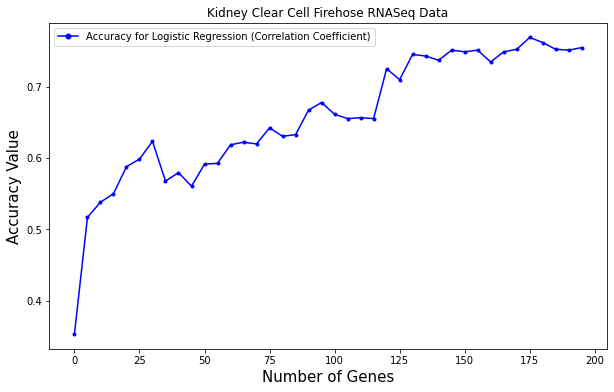

In [169]:
plt.figure(figsize=(10, 6)) 

genes = [i*5 for i in range(40)]

plt.errorbar(genes,finalAcc,linestyle='-', marker='.', color='blue')

plt.title("Kidney Clear Cell Firehose RNASeq Data")


p1 = mlines.Line2D([], [], color='blue', marker='.', linestyle='-',
                          markersize=10, label='Accuracy for Logistic Regression (Correlation Coefficient)')


plt.legend(handles=[p1])




plt.xlabel("Number of Genes",size =15)
plt.ylabel("Accuracy Value",size=15)